# CS559: Homework #2
Assignment #2: Due on 3/12/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [291]:
from sklearn import datasets
import pandas as pd
import numpy as np
q1 = pd.read_csv('q1/HW2_Q2_0.csv', names = ['X','Y'])
q1.head(5)

,X,Y
0,-0.452720,-0.018213
1,-0.169793,1.073745
2,1.128729,-2.395042
3,0.122506,-0.973069
4,-0.409200,0.129649


1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [292]:
from sklearn.cluster import KMeans
import  matplotlib.pyplot as plt

kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

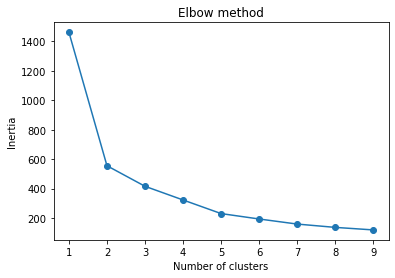

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,415.838284
n = 4,322.950849
n = 5,230.504896
n = 6,193.745547
n = 7,159.296915
n = 8,136.767778
n = 9,119.581612


In [293]:
plot_inertia(kmeans, q1, range(1, 10))
#from the elbow method ,K = 5 is appropriate.

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

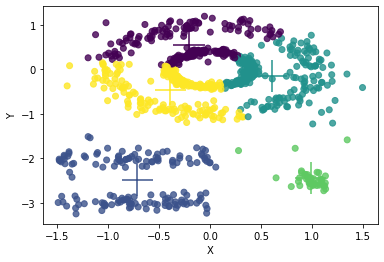

In [294]:
kmeans.set_params(n_clusters=5)
kmeans.fit(q1)
plt.scatter(q1.values[:, 0], q1.values[:, 1], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0,1,2,3,4])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [295]:
from numpy import *
import time
  
# calculate Euclidean distance
def euclDistance(vector1, vector2):
    return sqrt(sum(power(vector2 - vector1, 2)))
 
# init centroids with random samples
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape
    centroids = zeros((k, dim))
    for i in range(k):
        index = int(random.uniform(0, numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids
 
# k-means cluster
def MY_KMeans(dataSet, k):
    numSamples = dataSet.shape[0]
    # first column stores which cluster this sample belongs to,
    # second column stores the error between this sample and its centroid
    clusterAssment = mat(zeros((numSamples, 2)))
    clusterChanged = True
 
    ## step 1: init centroids
    centroids = initCentroids(dataSet, k)
 
    while clusterChanged:
        clusterChanged = False
        ## for each sample
        for i in range(numSamples):
            minDist  = 100000.0
            minIndex = 0
            ## for each centroid
            ## step 2: find the centroid who is closest
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist  = distance
                    minIndex = j

            ## step 3: update its cluster
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist**2
 
        ## step 4: update centroids
        for j in range(k):
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]
            centroids[j, :] = mean(pointsInCluster, axis = 0)
 
    print('Congratulations, cluster complete!')
    return centroids, clusterAssment
 


1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [296]:
print("step 1: load data...")
dataset = q1
## step 2: clustering...
print("step 2: clustering...") 
dataSet = mat(dataset)
k = 6
centroids, clusterAssment = MY_KMeans(dataSet, k)
print(centroids)

step 1: load data...
step 2: clustering...
Congratulations, cluster complete!
[[ 0.6345796   0.12730168]
 [-0.59059376 -0.24892665]
 [ 0.22966356 -0.64069068]
 [-0.71233034 -2.48567719]
 [-0.2071556   0.59001706]
 [ 0.98254447 -2.44694527]]


1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

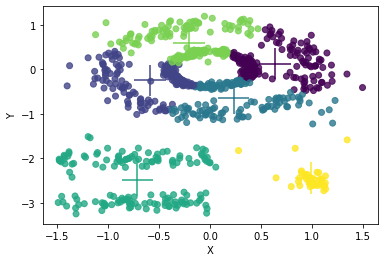

In [297]:
q1['Class'] = clusterAssment[:,0]
q1
plt.scatter(q1.values[:, 0], q1.values[:, 1], c=q1['Class'], alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="+", s=1000, c=[1,2,3,4,5,6])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

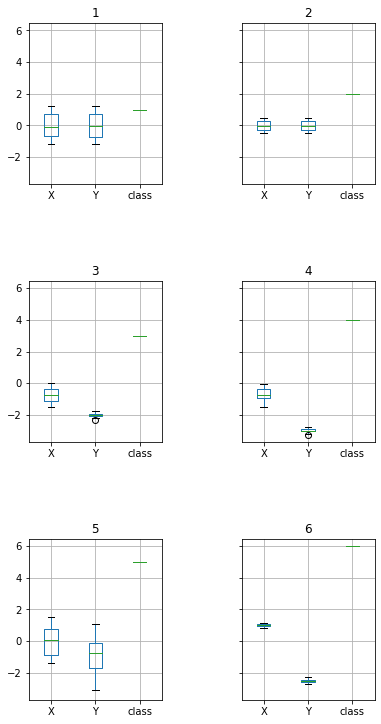

In [298]:
q2 = pd.read_csv('HW2_Q2_1.csv',names = ['X','Y','class'])
q2 = q2.groupby('class')
q2.boxplot()
plt.subplots_adjust(left=None,bottom=None,right=None,top=2.5,wspace=0.6,hspace=0.6)
plt.show()
#I pre-determined K = 5, the ture K = 6. From the elbow methond, the slopes of the point 5 and 6 almost same.
#I used sklearn-kmeans to test the results of 5 and 6(1-c). Compared to the ture label, obviously when the k = 6,the result is more likely to true labels.


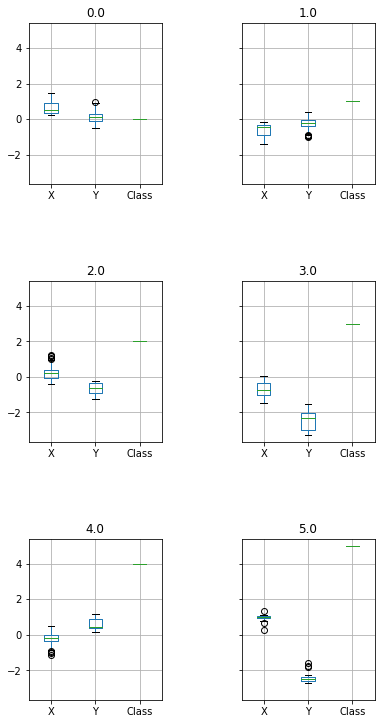

In [299]:
dataset = dataset.groupby('Class')
dataset.boxplot()
plt.subplots_adjust(left=None,bottom=None,right=None,top=2.5,wspace=0.6,hspace=0.6)
plt.show()


1-h. Evalaute your result. (5 pts)

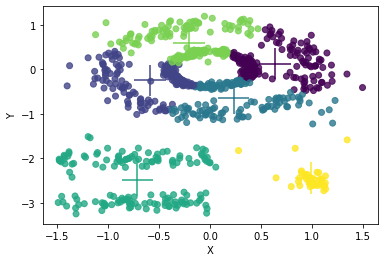

In [300]:
#my_kmeans
plt.scatter(q1.values[:, 0], q1.values[:, 1], c=q1['Class'], alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="+", s=1000, c=[1,2,3,4,5,6])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(1)I compared the scatterplot of my_kmeans, sklean-kmeans(1-c) and true labels(2-b),when k = 6.
It shows that the two "Parallel lines" datas's cluster results is different. my_kmeans always put those data together while sklearn-kmeans Separate them as two clusters. And the true labels is same as sklean-kmeans's result of two "Parallel lines" datas.
(2)I compared the boxplot of my_kmeans with true labels(1-g).
It shows that there are more outliers in my_kmeans result than true labels when k = 6.But the data are more concentrate than true labels.
According to the true labels scatterplot, i found that k-means cluster is not suitable to deal with 'circle' distribution of datas.


## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

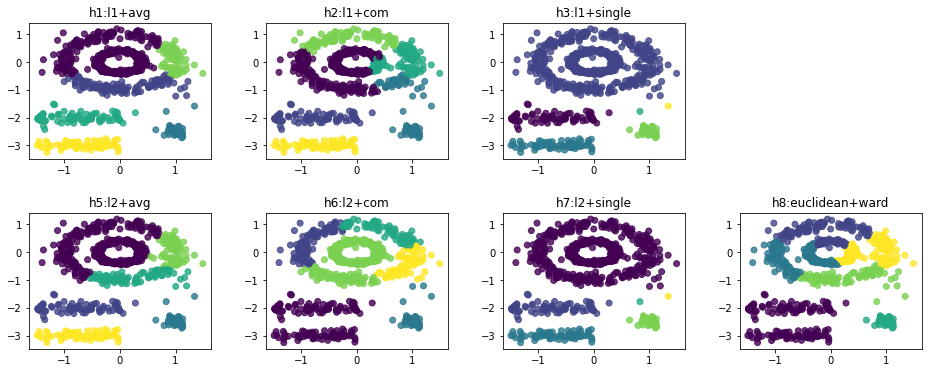

In [301]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
q3 = pd.read_csv('q1/HW2_Q2_0.csv', names = ['X','Y'])
hier = AgglomerativeClustering()
#plt.figure()
plt.figure(figsize=(16,6))

#h1
plt.subplot(2,4,1)
h1 = hier.set_params(n_clusters=6,affinity = 'l1',linkage='average')
h1.fit(q3)
plt.title('h1:l1+avg')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h1.labels_, alpha=0.8)

#h2
plt.subplot(2,4,2)
h2 = hier.set_params(n_clusters=6,affinity = 'l1',linkage='complete')
h2.fit(q3)
plt.title('h2:l1+com')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h2.labels_, alpha=0.8)

#h3
plt.subplot(2,4,3)
h3 = hier.set_params(n_clusters=6,affinity = 'l1',linkage='single')
h3.fit(q3)
plt.title('h3:l1+single')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h3.labels_, alpha=0.8)

#h4

#h5
plt.subplot(2,4,5)
h5 = hier.set_params(n_clusters=6,affinity = 'l2',linkage='average')
h5.fit(q3)
plt.title('h5:l2+avg')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h5.labels_, alpha=0.8)

#h6
plt.subplot(2,4,6)
h6 = hier.set_params(n_clusters=6,affinity = 'l2',linkage='complete')
h6.fit(q3)
plt.title('h6:l2+com')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h6.labels_, alpha=0.8)

#h7
plt.subplot(2,4,7)
h7 = hier.set_params(n_clusters=6,affinity = 'l2',linkage='single')
h7.fit(q3)
plt.title('h7:l2+single')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h7.labels_, alpha=0.8)

#h8
plt.subplot(2,4,8)
h8 = hier.set_params(n_clusters=6,affinity = 'euclidean',linkage='ward')
h8.fit(q3)
plt.title('h8:euclidean+ward')
plt.scatter(q3.values[:, 0], q3.values[:, 1], c=h8.labels_, alpha=0.8)

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.4)
plt.show()

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

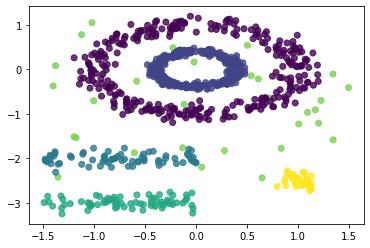

In [302]:
#from 2-a, I ues scatterplot compared different distances and linkages.It shows that l1/l2 + avg is the best and l1/l2 + single is worst.
res = pd.read_csv('HW2_Q2_1.csv', names = ['X','Y','class'])
plt.scatter(res.values[:, 0], res.values[:, 1], c=res['class'], alpha=0.8)
plt.show()

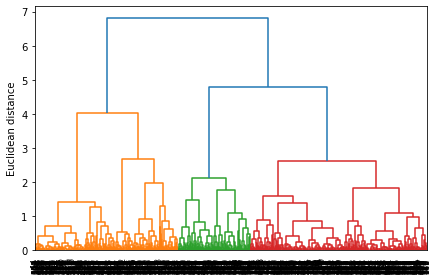

In [303]:
def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df
q3['Class'] = h6.labels_
linkage_df = linkage_frame(q3.values)
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [304]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

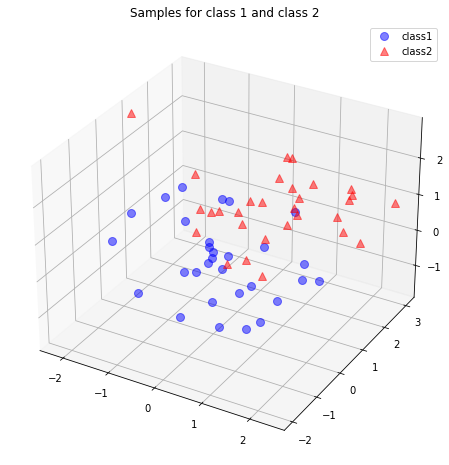

In [305]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

    1. Take the dataset w/o classes. 

In [306]:
all_samples =np.hstack((class1_sample,class2_sample))
#all_samples = np.random.multivariate_normal(mu_vec2+mu_vec1, cov_mat2, 60).T
assert all_samples.shape == (3,60), "The matrix has not the dimensions 3x60"


    2. Compute the d-dimentional mean vector.

In [307]:
mean = np.mean(all_samples, axis=1)
mean

array([0.47343911, 0.52653958, 0.73360656])

In [308]:
mean_x = mean[0]
mean_y = mean[1]
mean_z = mean[2]

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


    3. Compute the scatter matrix as following. 
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
    where $\bar{\textbf{x}}$ is the mean vector.

In [309]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i]-mean_vector).dot((all_samples[:,i]-mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[217.37768658 216.3796061  212.48755958]
 [216.3796061  215.88906445 213.97618171]
 [212.48755958 213.97618171 219.78111096]]


    Then compute the covariance matrix using `np.cov()` function.

In [310]:
cov_mat = np.cov(all_samples)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.12432002  0.27043376  0.15901633]
 [ 0.27043376  1.23833166 -0.01238244]
 [ 0.15901633 -0.01238244  1.25001409]]


    4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 

In [311]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]
Eigenvalue 1 from scatter matrix: 646.2448522534615
Eigenvalue 1 from covariance matrix: 0.8592333131868222
Scaling factor:  752.118013041877
------------------------------------------------------------
Eigenvector 2: 
[[-0.6149445 ]
 [ 0.77264151]
 [-0.15769701]]
Eigenvalue 2 from scatter matrix: 3.002283578795325e-15
Eigenvalue 2 from covariance matrix: 1.4956003667822713
Scaling factor:  2.0074102985509603e-15
------------------------------------------------------------
Eigenvector 3: 
[[-0.5371312 ]
 [-0.26399196]
 [ 0.80112316]]
Eigenvalue 3 from scatter matrix: 6.8030097336431705
Eigenvalue 3 from covariance matrix: 1.2578320969790302
Scaling factor:  5.408519745983701
------------------------------------------------------------


    5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 

In [312]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

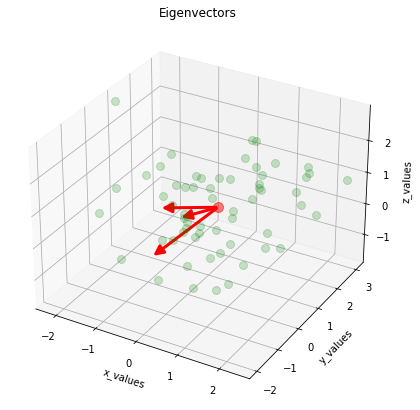

In [313]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

    6. Sort the eigenvectors by descreasing eigenvalues. 

    The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

In [314]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
print(eig_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
     print(i[0])

[(646.2448522534615, array([-0.57735027, -0.57735027, -0.57735027])), (3.002283578795325e-15, array([-0.6149445 ,  0.77264151, -0.15769701])), (6.8030097336431705, array([-0.5371312 , -0.26399196,  0.80112316]))]
646.2448522534615
6.8030097336431705
3.002283578795325e-15


   7. Choose *k* eigenvectors with the largest eigenvalues.

    We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.

In [315]:
eig_pairs[1][1]

array([-0.5371312 , -0.26399196,  0.80112316])

In [316]:
a1=eig_pairs[0][1]
a2=eig_pairs[1][1]
matrix_w = np.vstack((a1,a2))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.57735027 -0.57735027 -0.57735027]
 [-0.5371312  -0.26399196  0.80112316]]


    8. Transform the samples onto the new subspace. 

    The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [317]:
transformed = matrix_w.dot(all_samples)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

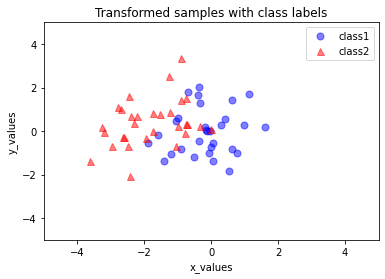

In [318]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

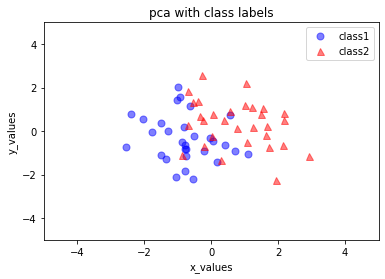

In [319]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(all_samples.T)
data = data.T
plt.plot(data[0,0:30], data[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(data[0,30:60], data[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('pca with class labels')

plt.show()
